# Import Dataset

In [ ]:
%pip install kagglehub

In [ ]:
%pip install pandas

In [ ]:
import kagglehub
import pandas as pd

In [ ]:
path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")
print("Path to dataset files:", path)

In [6]:
df = pd.read_csv(path + "/train.csv")

In [7]:
df.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [8]:
df.columns = ['Label', 'Title', 'Review']

In [9]:
def update_label(label):
    if label == 1:
        return 0
    else:
        return 1

In [10]:
df['Label'] = df['Label'].map(update_label)
df.head()

,Label,Title,Review
0,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,1,Amazing!,This soundtrack is my favorite music of all ti...
2,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,1,an absolute masterpiece,I am quite sure any of you actually taking the...


# Exploratory Data Analysis

In [11]:
# Dataset Overview
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nSentiment Distribution:")
print(df['Label'].value_counts())
print("\nPercentage Distribution:")
print(df['Label'].value_counts(normalize=True) * 100)

Dataset Shape: (3599999, 3)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Label   int64 
 1   Title   object
 2   Review  object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB
None

Sentiment Distribution:
Label
0    1800000
1    1799999
Name: count, dtype: int64

Percentage Distribution:
Label
0    50.000014
1    49.999986
Name: proportion, dtype: float64


In [ ]:
%pip install matplotlib seaborn

In [ ]:
# Visualize sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Sentiment distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Label', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')

# Review length analysis
df['Review_Length'] = df['Review'].str.len()
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Label', y='Review_Length', palette='viridis')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Review Length (characters)')

plt.tight_layout()
plt.show()

# Text Preprocessing

In [14]:
# Convert all the reviews to lowercase
df['Review'] = df['Review'].str.lower()

In [15]:
import re
# Remove URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))


In [16]:
# Remove punctuation
import string

mapping_table = str.maketrans('', '', string.punctuation)
df['Review'] = df['Review'].apply(lambda x: x.translate(mapping_table))

# Remove numbers
df['Review'] = df['Review'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove extra whitespace
df['Review'] = df['Review'].apply(lambda x: ' '.join(x.split()))

In [ ]:
%pip install emoji

In [18]:
# Convert emojis to text
import emoji

df['Review'] = df['Review'].apply(lambda x: emoji.demojize(x))

In [19]:
# Remove special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
%pip install nltk

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
df['Tokens'] = df['Review'].apply(lambda x: word_tokenize(x))

In [ ]:
# Removal stopwords
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
%pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

### Spacy Lemmatization

In [ ]:
# Spacy Lemmatization
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def spacy_lemmatize(texts):
    docs = list(nlp.pipe(texts, batch_size=100, n_process=1))
    return [[token.lemma_ for token in doc] for doc in docs]

df['Tokens'] = spacy_lemmatize(df['Tokens'].apply(" ".join))

### NLTK Lemmatization

In [ ]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag_sents
from nltk.corpus import wordnet 
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_tokens(tagged_sentence):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_sentence]

tagged_tokens = pos_tag_sents(df['Tokens'].tolist())

df['Tokens'] = [lemmatize_tokens(sentence) for sentence in tagged_tokens]

In [ ]:
%pip install wordcloud
%pip install matplotlib

In [ ]:
all_tokens = [word for tokens in df['Tokens'] for word in tokens if isinstance(word, str)]

print(all_tokens[:50])

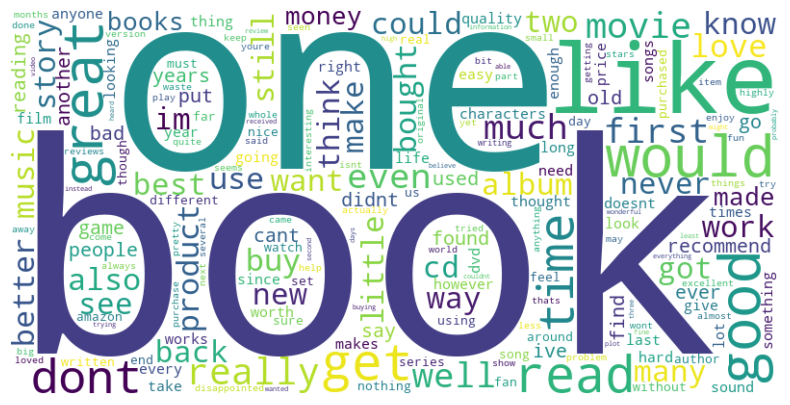

In [3]:
# Visualization
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(nltk.FreqDist(all_tokens)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

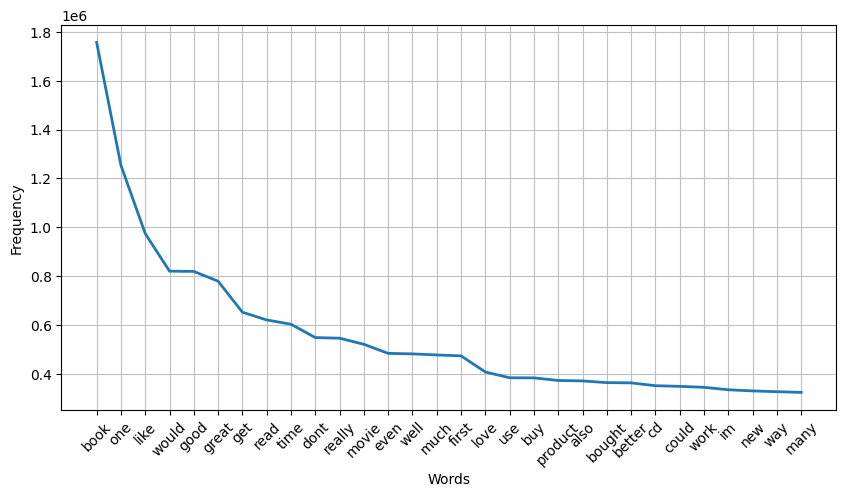

In [4]:
# Word Frequency Distribution
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

freq_dist = FreqDist(all_tokens)
plt.figure(figsize=(10, 5))
freq_dist.plot(30, cumulative=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [29]:
df.to_csv("sentiment_analysis.csv", index=False)

In [1]:
import pandas as pd

df = pd.read_csv("sentiment_analysis.csv")

In [ ]:
import ast

# Convert stringified lists to actual Python lists
df['Tokens'] = df['Tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# flatten 
all_tokens = [word for tokens in df['Tokens'] for word in tokens if isinstance(word, str)]

print(all_tokens[:50])

['im', 'reading', 'lot', 'reviews', 'saying', 'best', 'game', 'soundtrack', 'figured', 'id', 'write', 'review', 'disagree', 'bit', 'opinino', 'yasunori', 'mitsudas', 'ultimate', 'masterpiece', 'music', 'timeless', 'im', 'listening', 'years', 'beauty', 'simply', 'refuses', 'fadethe', 'price', 'tag', 'pretty', 'staggering', 'must', 'say', 'going', 'buy', 'cd', 'much', 'money', 'one', 'feel', 'would', 'worth', 'every', 'penny', 'soundtrack', 'favorite', 'music', 'time', 'hands']


# Feature Extraction 

In [ ]:
%pip install scikit-learn
%pip install gensim

In [ ]:
%pip install --upgrade numpy scikit-learn gensim

In [4]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split

X = df['Tokens']
y = df['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Training sentiment distribution:")
print(y_train.value_counts(normalize=True))

Training set size: 2879999
Test set size: 720000
Training sentiment distribution:
Label
0    0.5
1    0.5
Name: proportion, dtype: float64


## Method-1 TF-IDF + Classical ML Models

In [6]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))
X_test_vectors = vectorizer.transform(X_test.apply(lambda x: ' '.join(x)))
print("TF-IDF feature shape:", X_train_vectors.shape)
print("TF-IDF vocabulary size:", len(vectorizer.vocabulary_))

TF-IDF feature shape: (2879999, 1771818)
TF-IDF vocabulary size: 1771818


In [ ]:
# Train multiple models with TF-IDF features
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import time

# Initialize models
tfidf_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    #'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'SVM': SVC(kernel='rbf', random_state=42, probability=True),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM' : LinearSVC(random_state=42)

}

# Train and evaluate TF-IDF models
tfidf_results = {}

for name, model in tfidf_models.items():
    print(f"\nTraining {name} with TF-IDF...")
    start_time = time.time()

    model.fit(X_train_vectors, y_train)
    y_pred = model.predict(X_test_vectors)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="binary")
    training_time = time.time() - start_time
    
    tfidf_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred,
        'training_time': training_time
    }
    
    print(f"{name} → Accuracy: {accuracy:.4f}, "
          f"F1: {f1:.4f}, "
          f"Training Time: {training_time:.2f} sec")


In [ ]:
# Inference
import re
import string
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

mapping_table = str.maketrans('', '', string.punctuation)

def predict_sentiments_tfidf(texts, model):
    texts = [re.sub(r'http\S+|www.\S+', '', text.lower()) for text in texts]
    texts = [text.translate(mapping_table) for text in texts]
    texts = [re.sub(r'\d+', '', text) for text in texts]
    texts = [' '.join(text.split()) for text in texts]
    texts = [emoji.demojize(text) for text in texts]
    texts = [re.sub(r'[^\w\s]', '', text) for text in texts]

    tokens = [word_tokenize(text) for text in texts]
    tokens = [[word for word in token if word not in stop_words] for token in tokens]
    tokens = [lemmatize_tokens(token) for token in tokens]

    new_text_vectors = vectorizer.transform([' '.join(token) for token in tokens])
    predictions = model.predict(new_text_vectors)

    return ['Positive' if pred == 1 else 'Negative' for pred in predictions]

In [17]:
texts = [
    "I absolutely love this product! It has changed my life for the better.",
    "This is the worst purchase I've ever made. Completely disappointed and frustrated.",
    "It's okay, not great but not terrible either. Just average.",
    "Fantastic quality and excellent customer service. Highly recommend!",
    "Terrible experience. The item broke after one use and customer service was unhelpful.",
    "Mediocre at best. It works, but there are definitely better options out there.",
    "Exceeded my expectations! Will definitely buy again."]

predictions = predict_sentiments_tfidf(texts, tfidf_models['Linear SVM'])
print(predictions)

['Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive']


## Method-2 Word2Vec + Deep Learning

In [ ]:
%pip install --upgrade numpy gensim

In [ ]:
%pip install --upgrade scipy


In [5]:
# OR word2vec Embeddings
from gensim.models import Word2Vec
import gensim
import numpy as np

word2vec_vectorizer = Word2Vec(sentences=df['Tokens'], min_count=1, vector_size=100, window=5, sg=1)


In [ ]:
%pip install keras tensorflow

In [7]:
# LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1


embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectorizer.wv:
        embedding_matrix[i] = word2vec_vectorizer.wv[word]


X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=100)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=100, weights=[embedding_matrix], trainable=False))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train_seq_pad, y_train, epochs=3, batch_size=64)

Epoch 1/3
45000/45000 ━━━━━━━━━━━━━━━━━━━━ 4159s 92ms/step - accuracy: 0.8994 - loss: 0.2436
Epoch 2/3
45000/45000 ━━━━━━━━━━━━━━━━━━━━ 4159s 92ms/step - accuracy: 0.8994 - loss: 0.2436
Epoch 2/3
45000/45000 ━━━━━━━━━━━━━━━━━━━━ 4106s 91ms/step - accuracy: 0.9144 - loss: 0.2120
Epoch 3/3
45000/45000 ━━━━━━━━━━━━━━━━━━━━ 4106s 91ms/step - accuracy: 0.9144 - loss: 0.2120
Epoch 3/3
45000/45000 ━━━━━━━━━━━━━━━━━━━━ 4454s 99ms/step - accuracy: 0.9191 - loss: 0.2016
45000/45000 ━━━━━━━━━━━━━━━━━━━━ 4454s 99ms/step - accuracy: 0.9191 - loss: 0.2016


In [12]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = (model.predict(X_test_seq_pad)>=0.5).astype(int)
print('accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

22500/22500 ━━━━━━━━━━━━━━━━━━━━ 643s 29ms/step
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 643s 29ms/step
accuracy:  0.9169902777777778
accuracy:  0.9169902777777778
              precision    recall  f1-score   support

           0       0.93      0.90      0.92    360000
           1       0.91      0.93      0.92    360000

    accuracy                           0.92    720000
   macro avg       0.92      0.92      0.92    720000
weighted avg       0.92      0.92      0.92    720000

              precision    recall  f1-score   support

           0       0.93      0.90      0.92    360000
           1       0.91      0.93      0.92    360000

    accuracy                           0.92    720000
   macro avg       0.92      0.92      0.92    720000
weighted avg       0.92      0.92      0.92    720000



In [ ]:
model.save("lstm_word2vec_model.h5")

In [15]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [ ]:
# Inference
import re
import string
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

mapping_table = str.maketrans('', '', string.punctuation)

def predict_sentiments_word2vec(texts, tokenizer, model, maxlen=100):
    texts = [re.sub(r'http\S+|www.\S+', '', text.lower()) for text in texts]
    texts = [text.translate(mapping_table) for text in texts]
    texts = [re.sub(r'\d+', '', text) for text in texts]
    texts = [' '.join(text.split()) for text in texts]
    texts = [emoji.demojize(text) for text in texts]
    texts = [re.sub(r'[^\w\s]', '', text) for text in texts]

    tokens = [word_tokenize(text) for text in texts]
    tokens = [[word for word in token if word not in stop_words] for token in tokens]
    #tokens = [lemmatize_tokens(token) for token in tokens]

    sequences = tokenizer.texts_to_sequences([' '.join(token) for token in tokens])
    padded_sequences = pad_sequences(sequences, maxlen=maxlen)

    predictions = model.predict(padded_sequences)
    return ['Positive' if pred >= 0.5 else 'Negative' for pred in predictions]

In [17]:
texts = [
    "I absolutely love this product! It has changed my life for the better.",
    "This is the worst purchase I've ever made. Completely disappointed and frustrated.",
    "It's okay, not great but not terrible either. Just average.",
    "Fantastic quality and excellent customer service. Highly recommend!",
    "Terrible experience. The item broke after one use and customer service was unhelpful.",
    "Mediocre at best. It works, but there are definitely better options out there.",
    "Exceeded my expectations! Will definitely buy again."]

predictions = predict_sentiments_word2vec(texts, tokenizer, model)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
['Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive']
['Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive']
